In [15]:
import numpy as np
import pandas as pd
import tsfel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from dataclasses import dataclass
import os
import matplotlib.ticker as mticker
import re

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

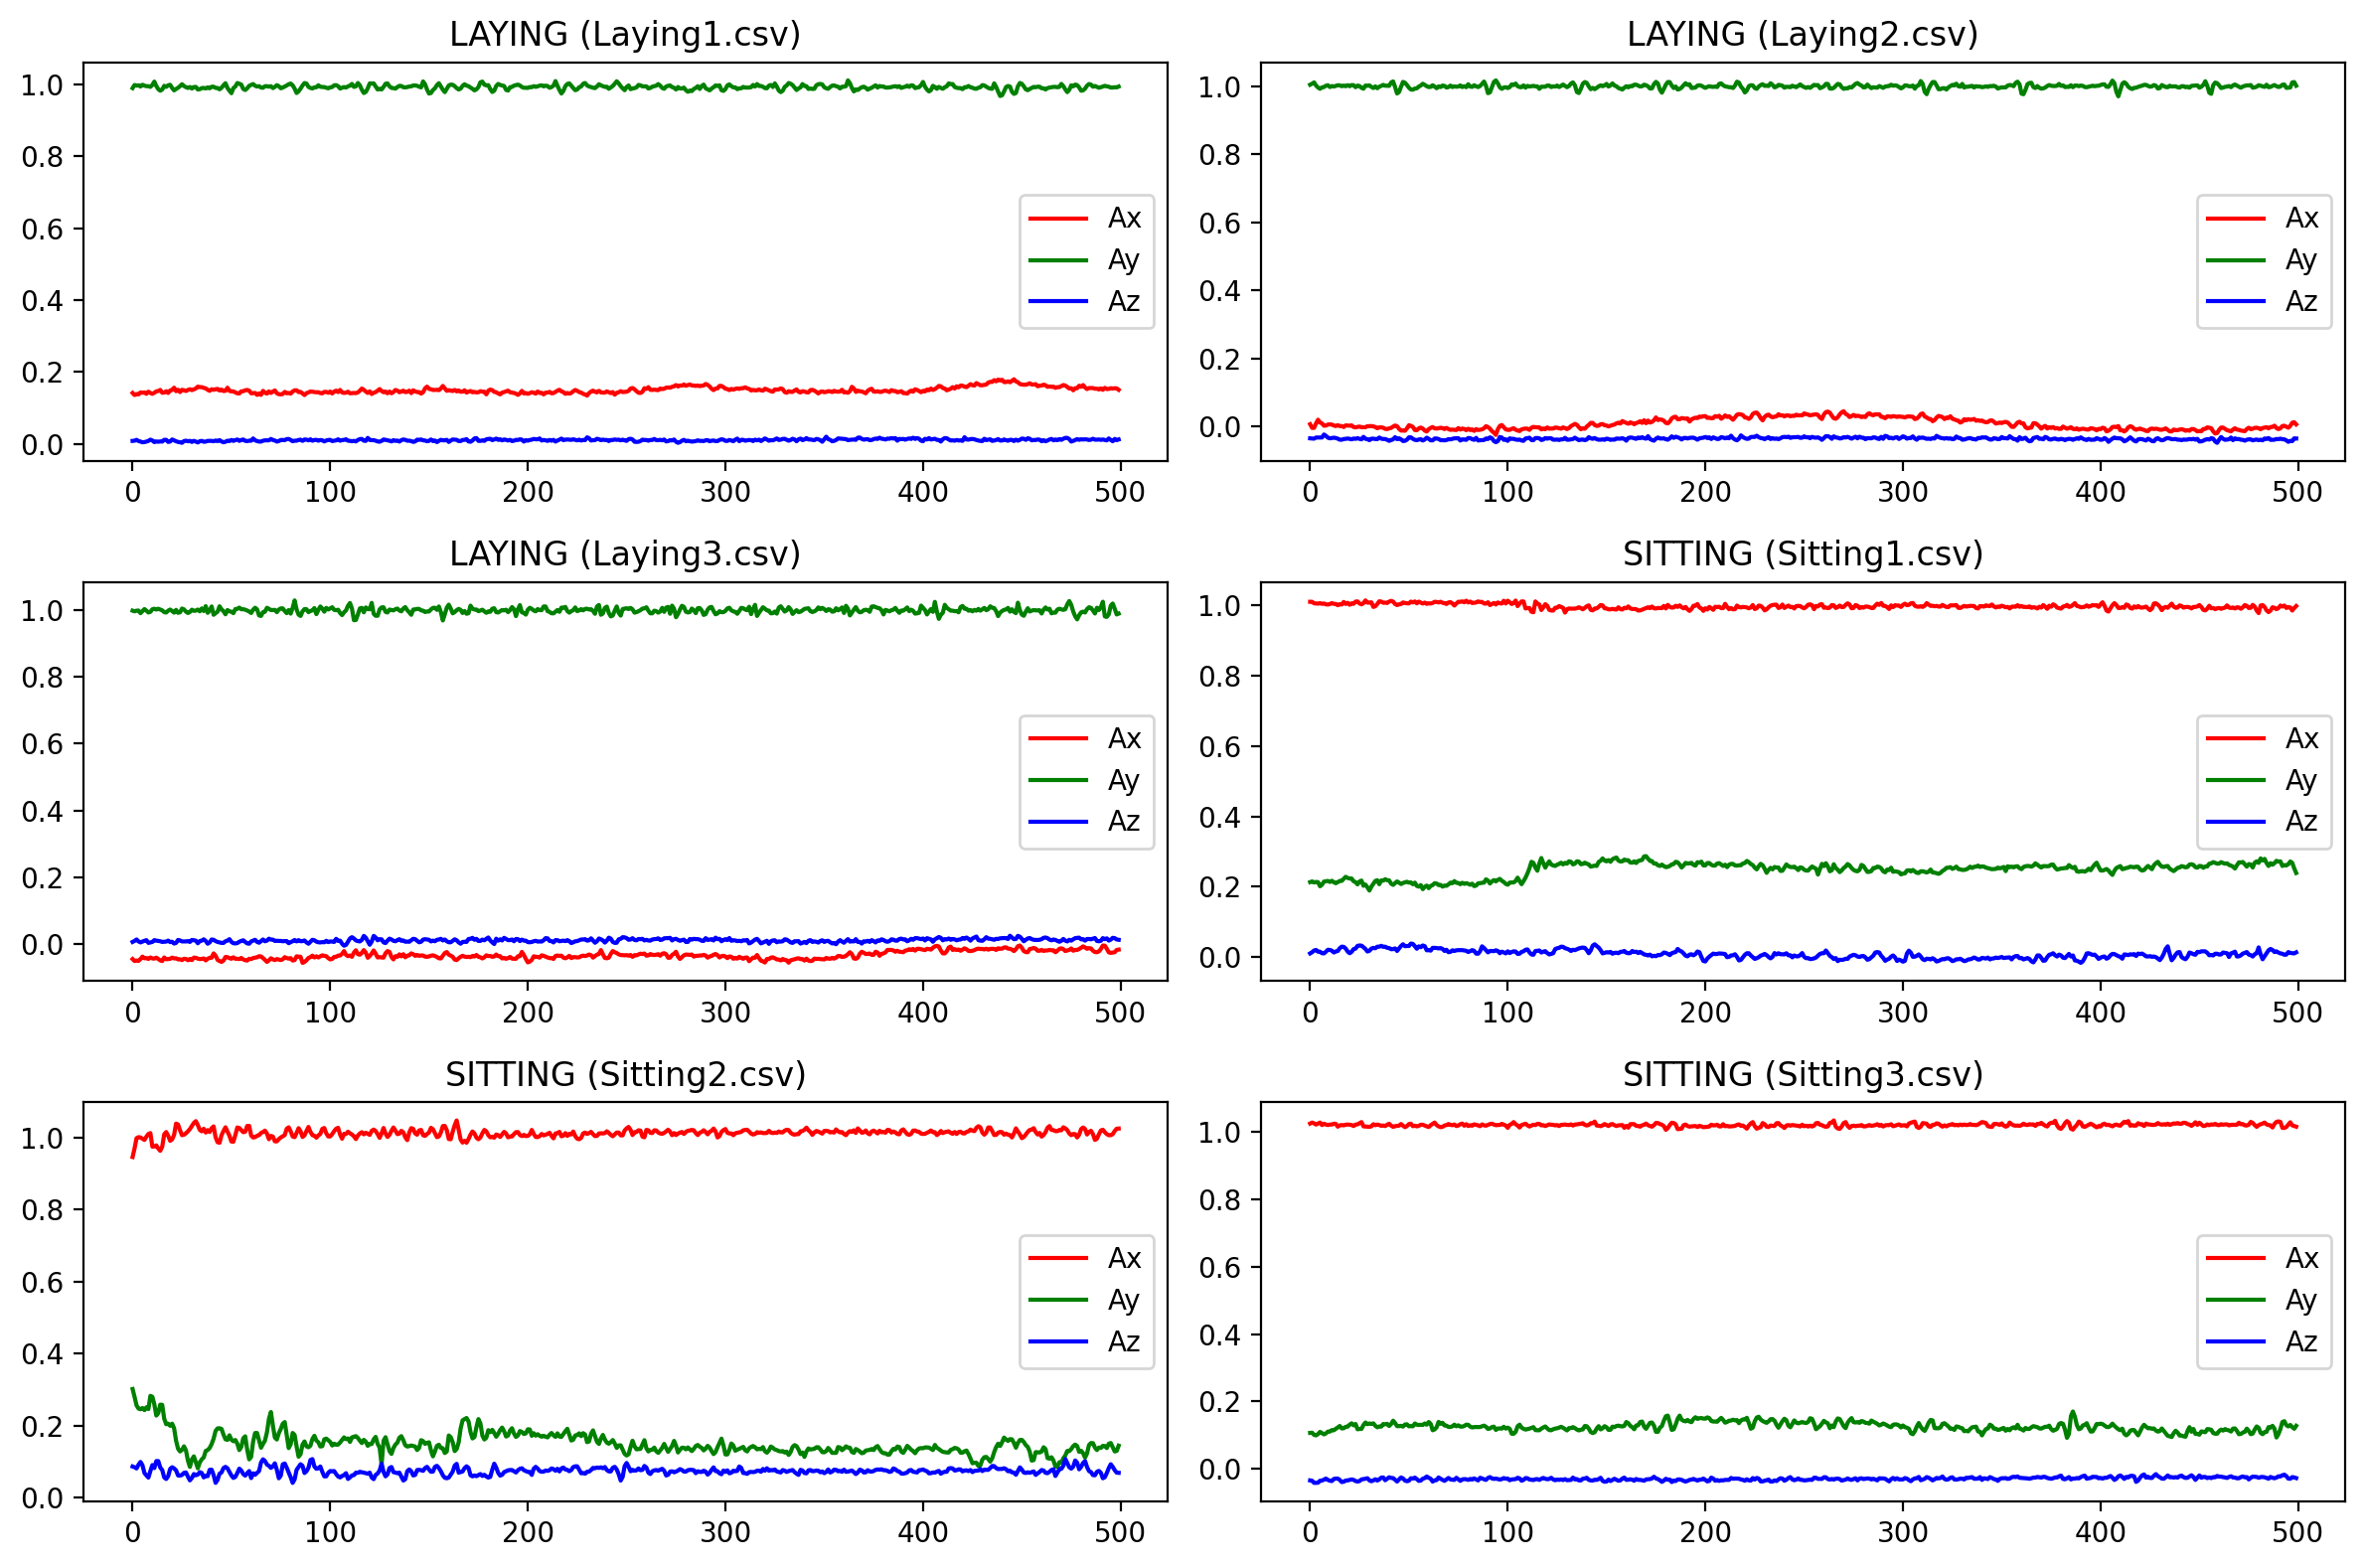

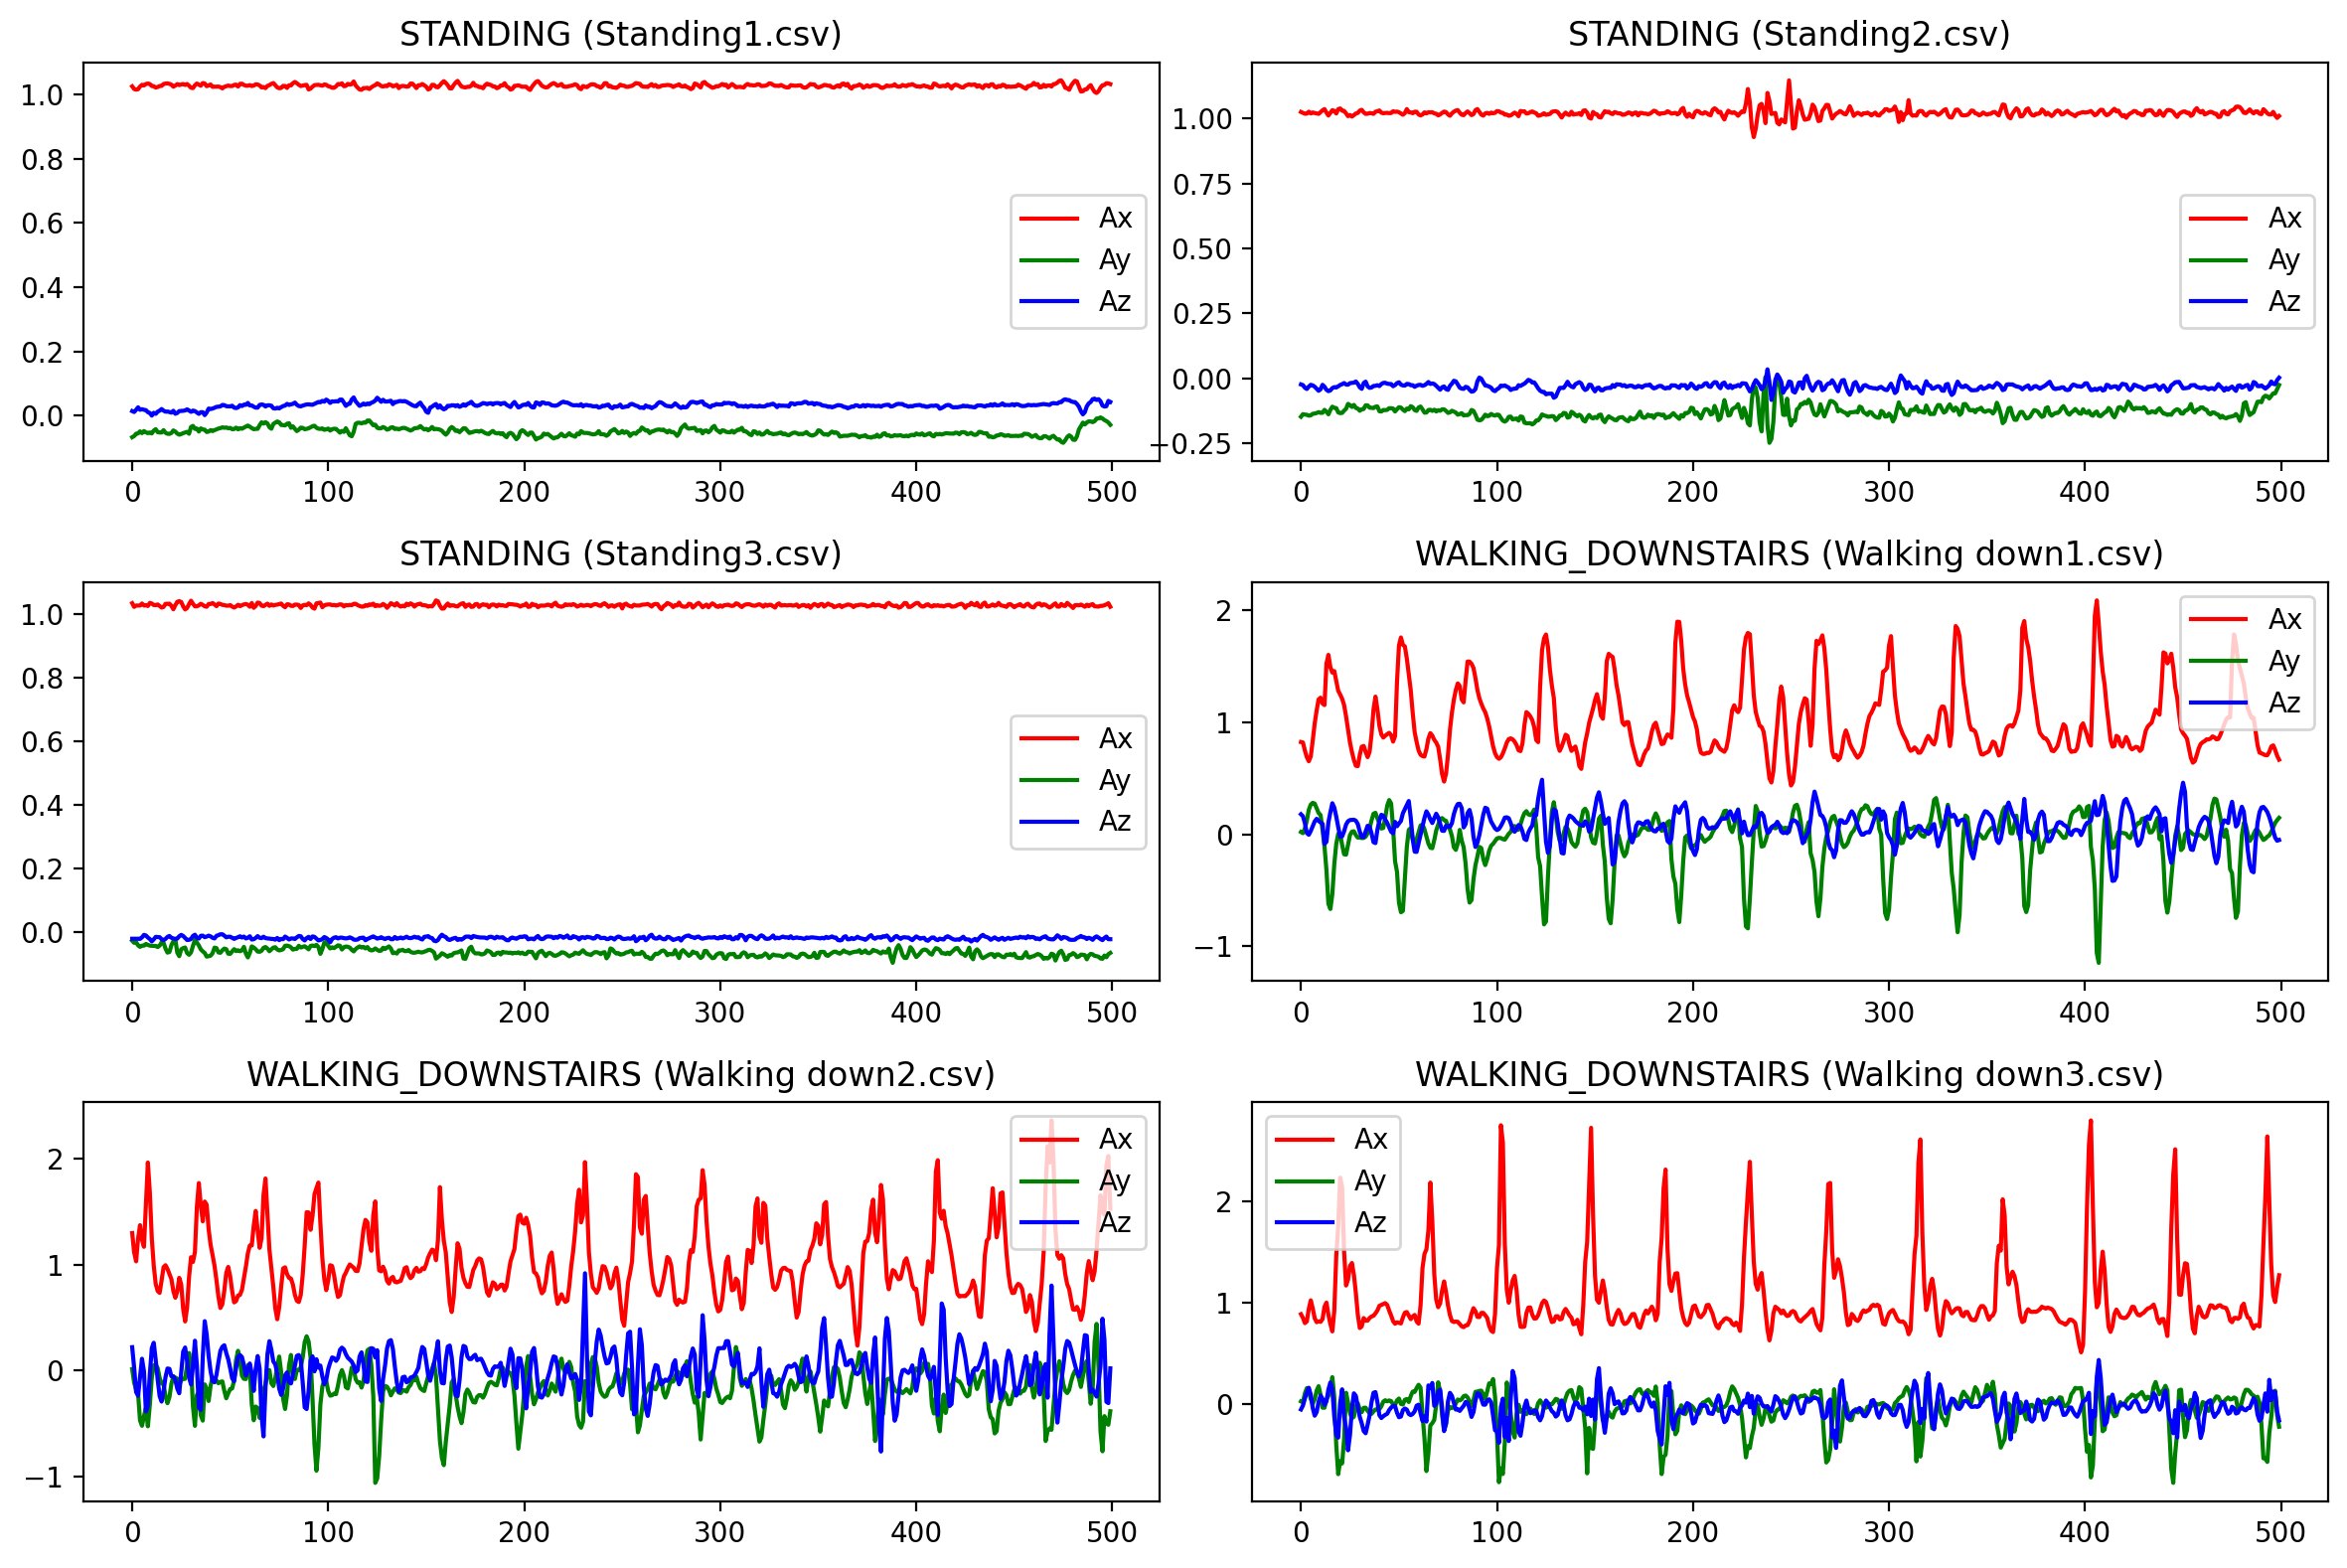

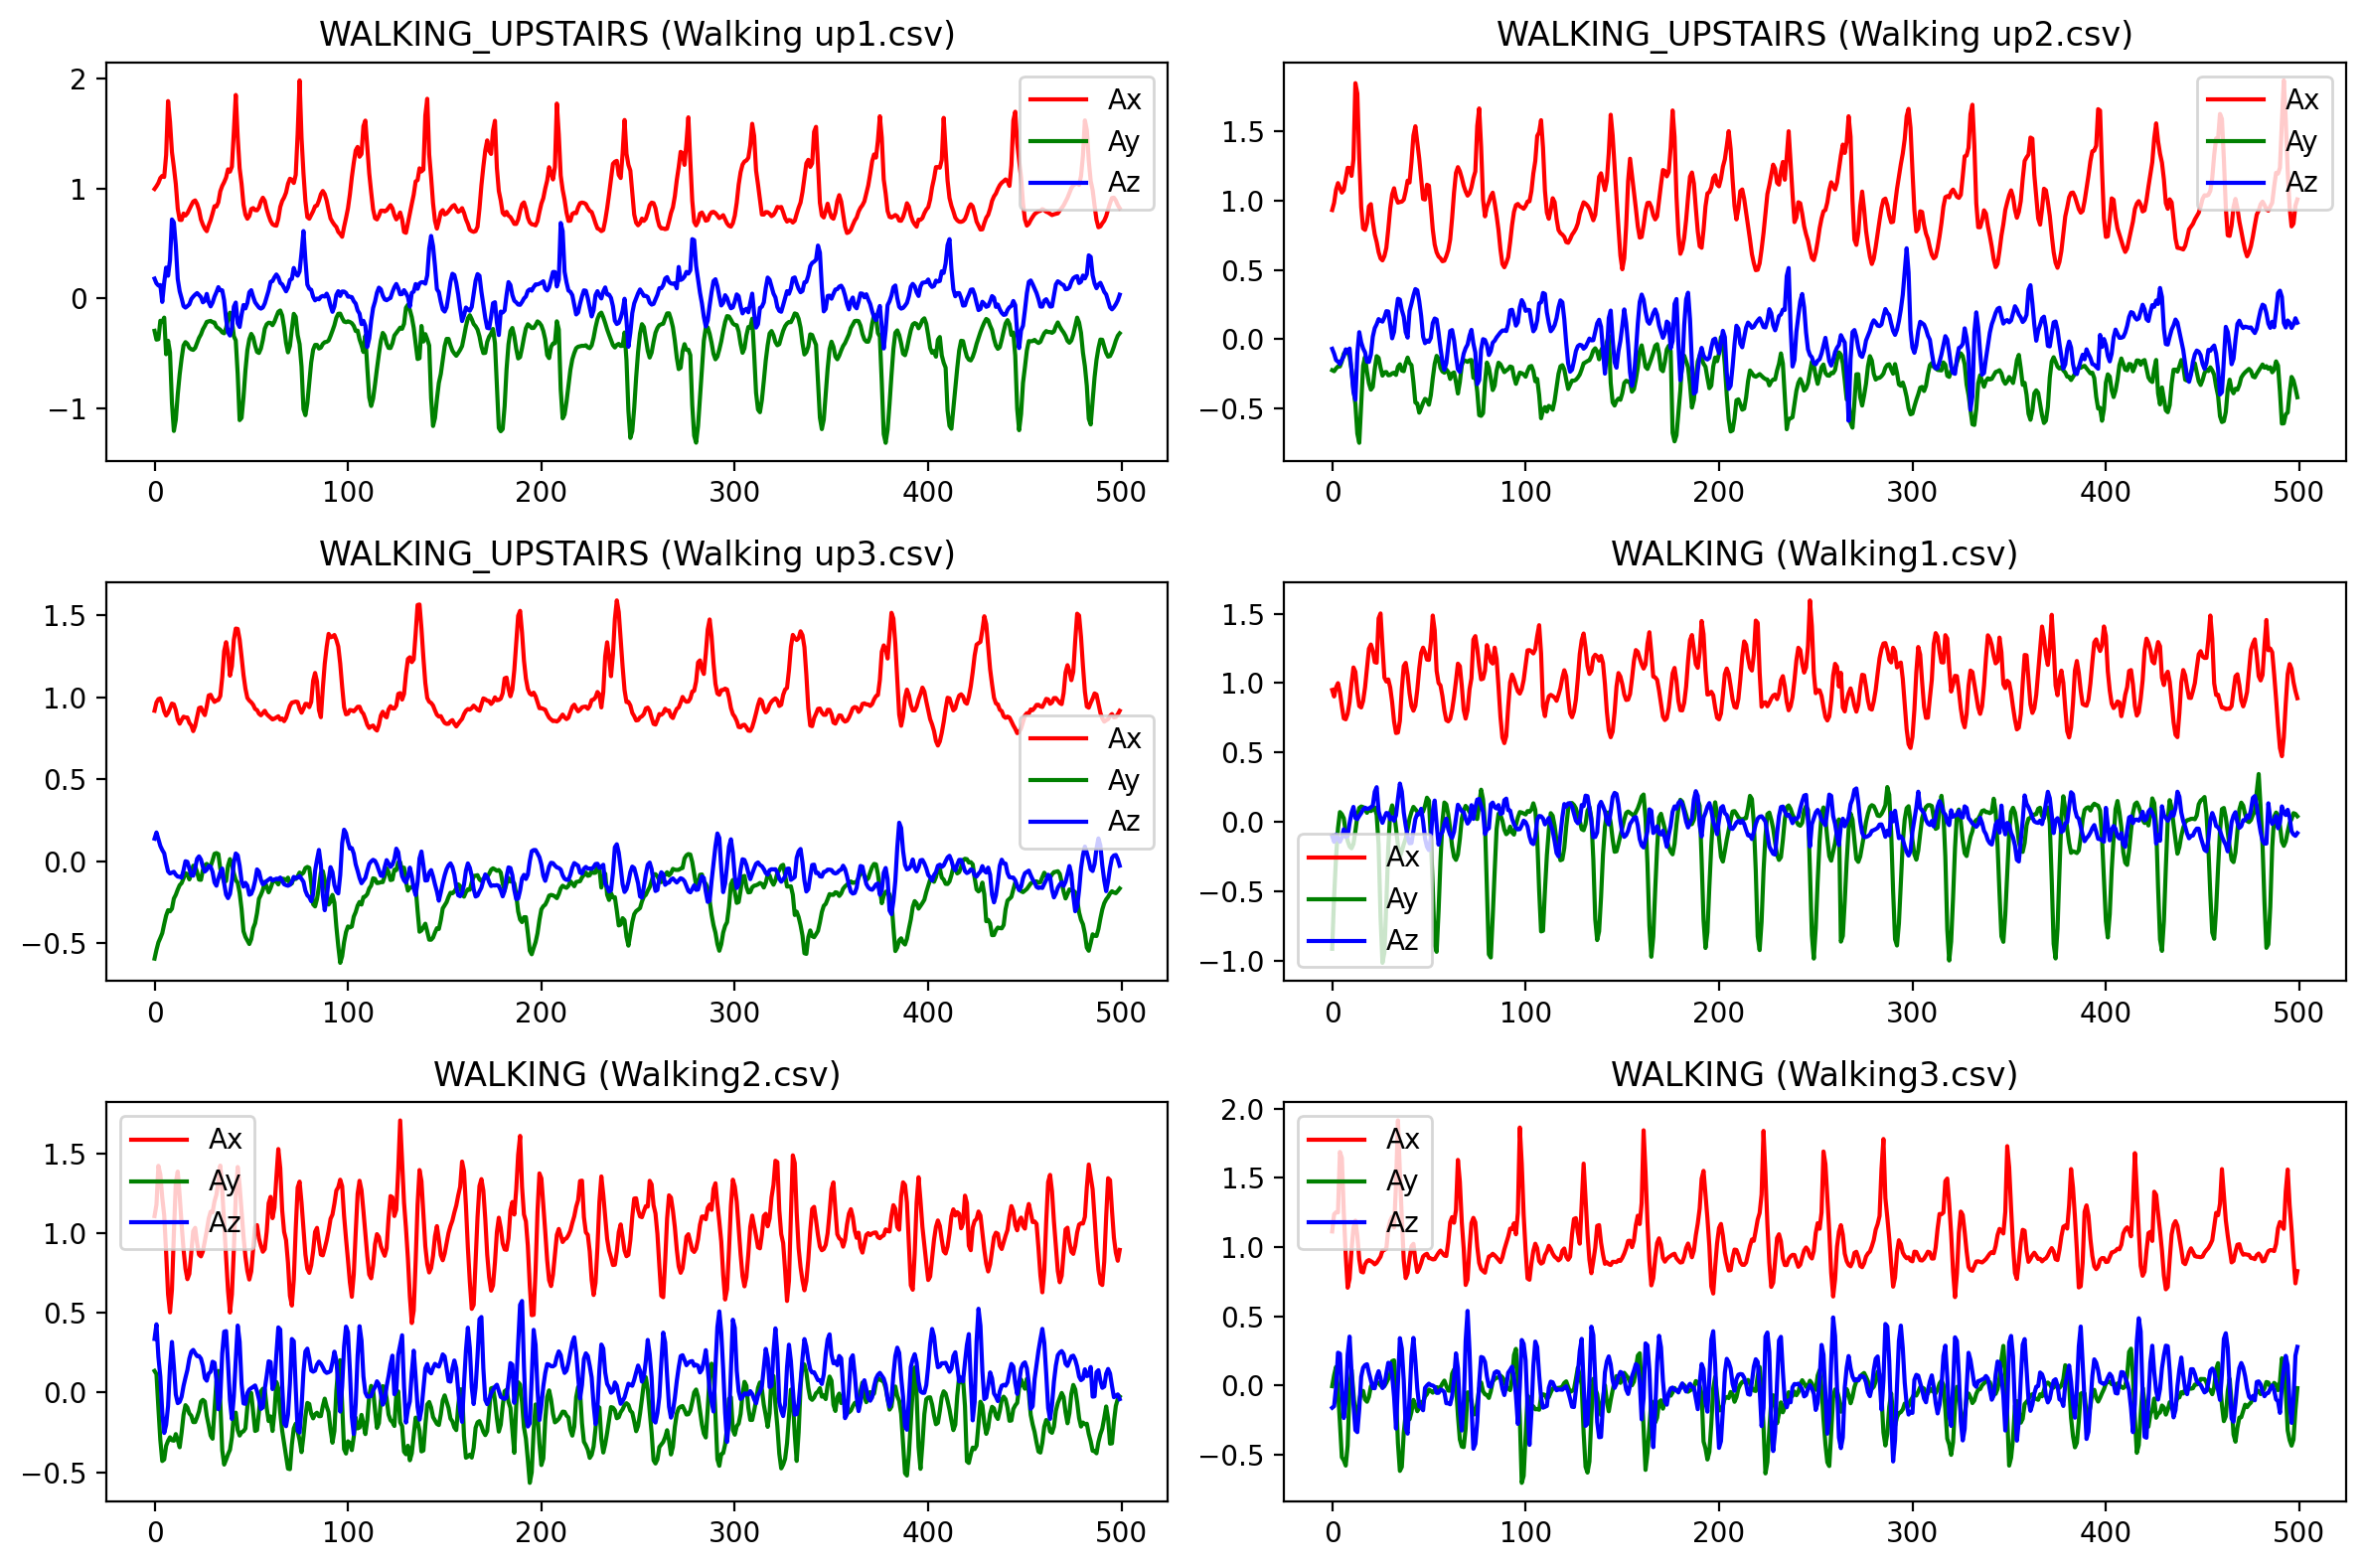

X_train shape: (18, 500, 3)
y_train shape: (18,)
Unique labels found: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


<Figure size 1200x800 with 0 Axes>

In [ ]:
X_train = []
y_train = []

folder_path = r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\Manual Data\Train"

# mapping rules (edit if your file names differ)
label_map = {
    "laying": "LAYING",
    "sitting": "SITTING",
    "standing": "STANDING",
    "walking": "WALKING",
    "walkingup": "WALKING_UPSTAIRS",
    "walkingupstairs": "WALKING_UPSTAIRS",
    "walkingdown": "WALKING_DOWNSTAIRS",
    "walkingdownstairs": "WALKING_DOWNSTAIRS",
}

plt.figure(figsize=(12, 8))
i = 1

for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # only take csv files
        data = pd.read_csv(os.path.join(folder_path, file))
        
        # drop unnecessary cols
        data_reduced = data.drop(columns=['time', 'TgF'])
        
        # reorder columns (make gFx first, etc.)
        data_reduced = data_reduced[['gFy', 'gFz', 'gFx']]
        data_reduced.columns = ['gFx', 'gFy', 'gFz']
        
        # downsample from 400 Hz to 50 Hz
        data = data_reduced.iloc[::8]
        
        # slice 300–800 samples
        data = data.iloc[300:800].reset_index(drop=True)
        
        X_train.append(data.values)
        
        # ---------- label extraction ----------
        base_name = os.path.splitext(file)[0]          # remove .csv
        base_name = re.sub(r'\d+', '', base_name)      # remove digits
        base_name = base_name.replace(" ", "").lower() # remove spaces, lowercase
        label = label_map.get(base_name, None)         # lookup in dictionary
        
        if label is None:
            print(f"⚠️ Skipping unknown label for file: {file}")
            continue
        else:
            y_train.append(label)
        
        # ---------- plotting ----------
        plt.subplot(3, 2, i)
        plt.plot(data['gFx'], label='Ax', color='red')
        plt.plot(data['gFy'], label='Ay', color='green')
        plt.plot(data['gFz'], label='Az', color='blue')
        plt.legend()
        plt.title(label + " (" + file + ")")
        
        i += 1
        if i > 6:   # show only first 6 plots per figure
            plt.tight_layout()
            plt.show()
            plt.figure(figsize=(12, 8))
            i = 1

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Unique labels found:", np.unique(y_train))


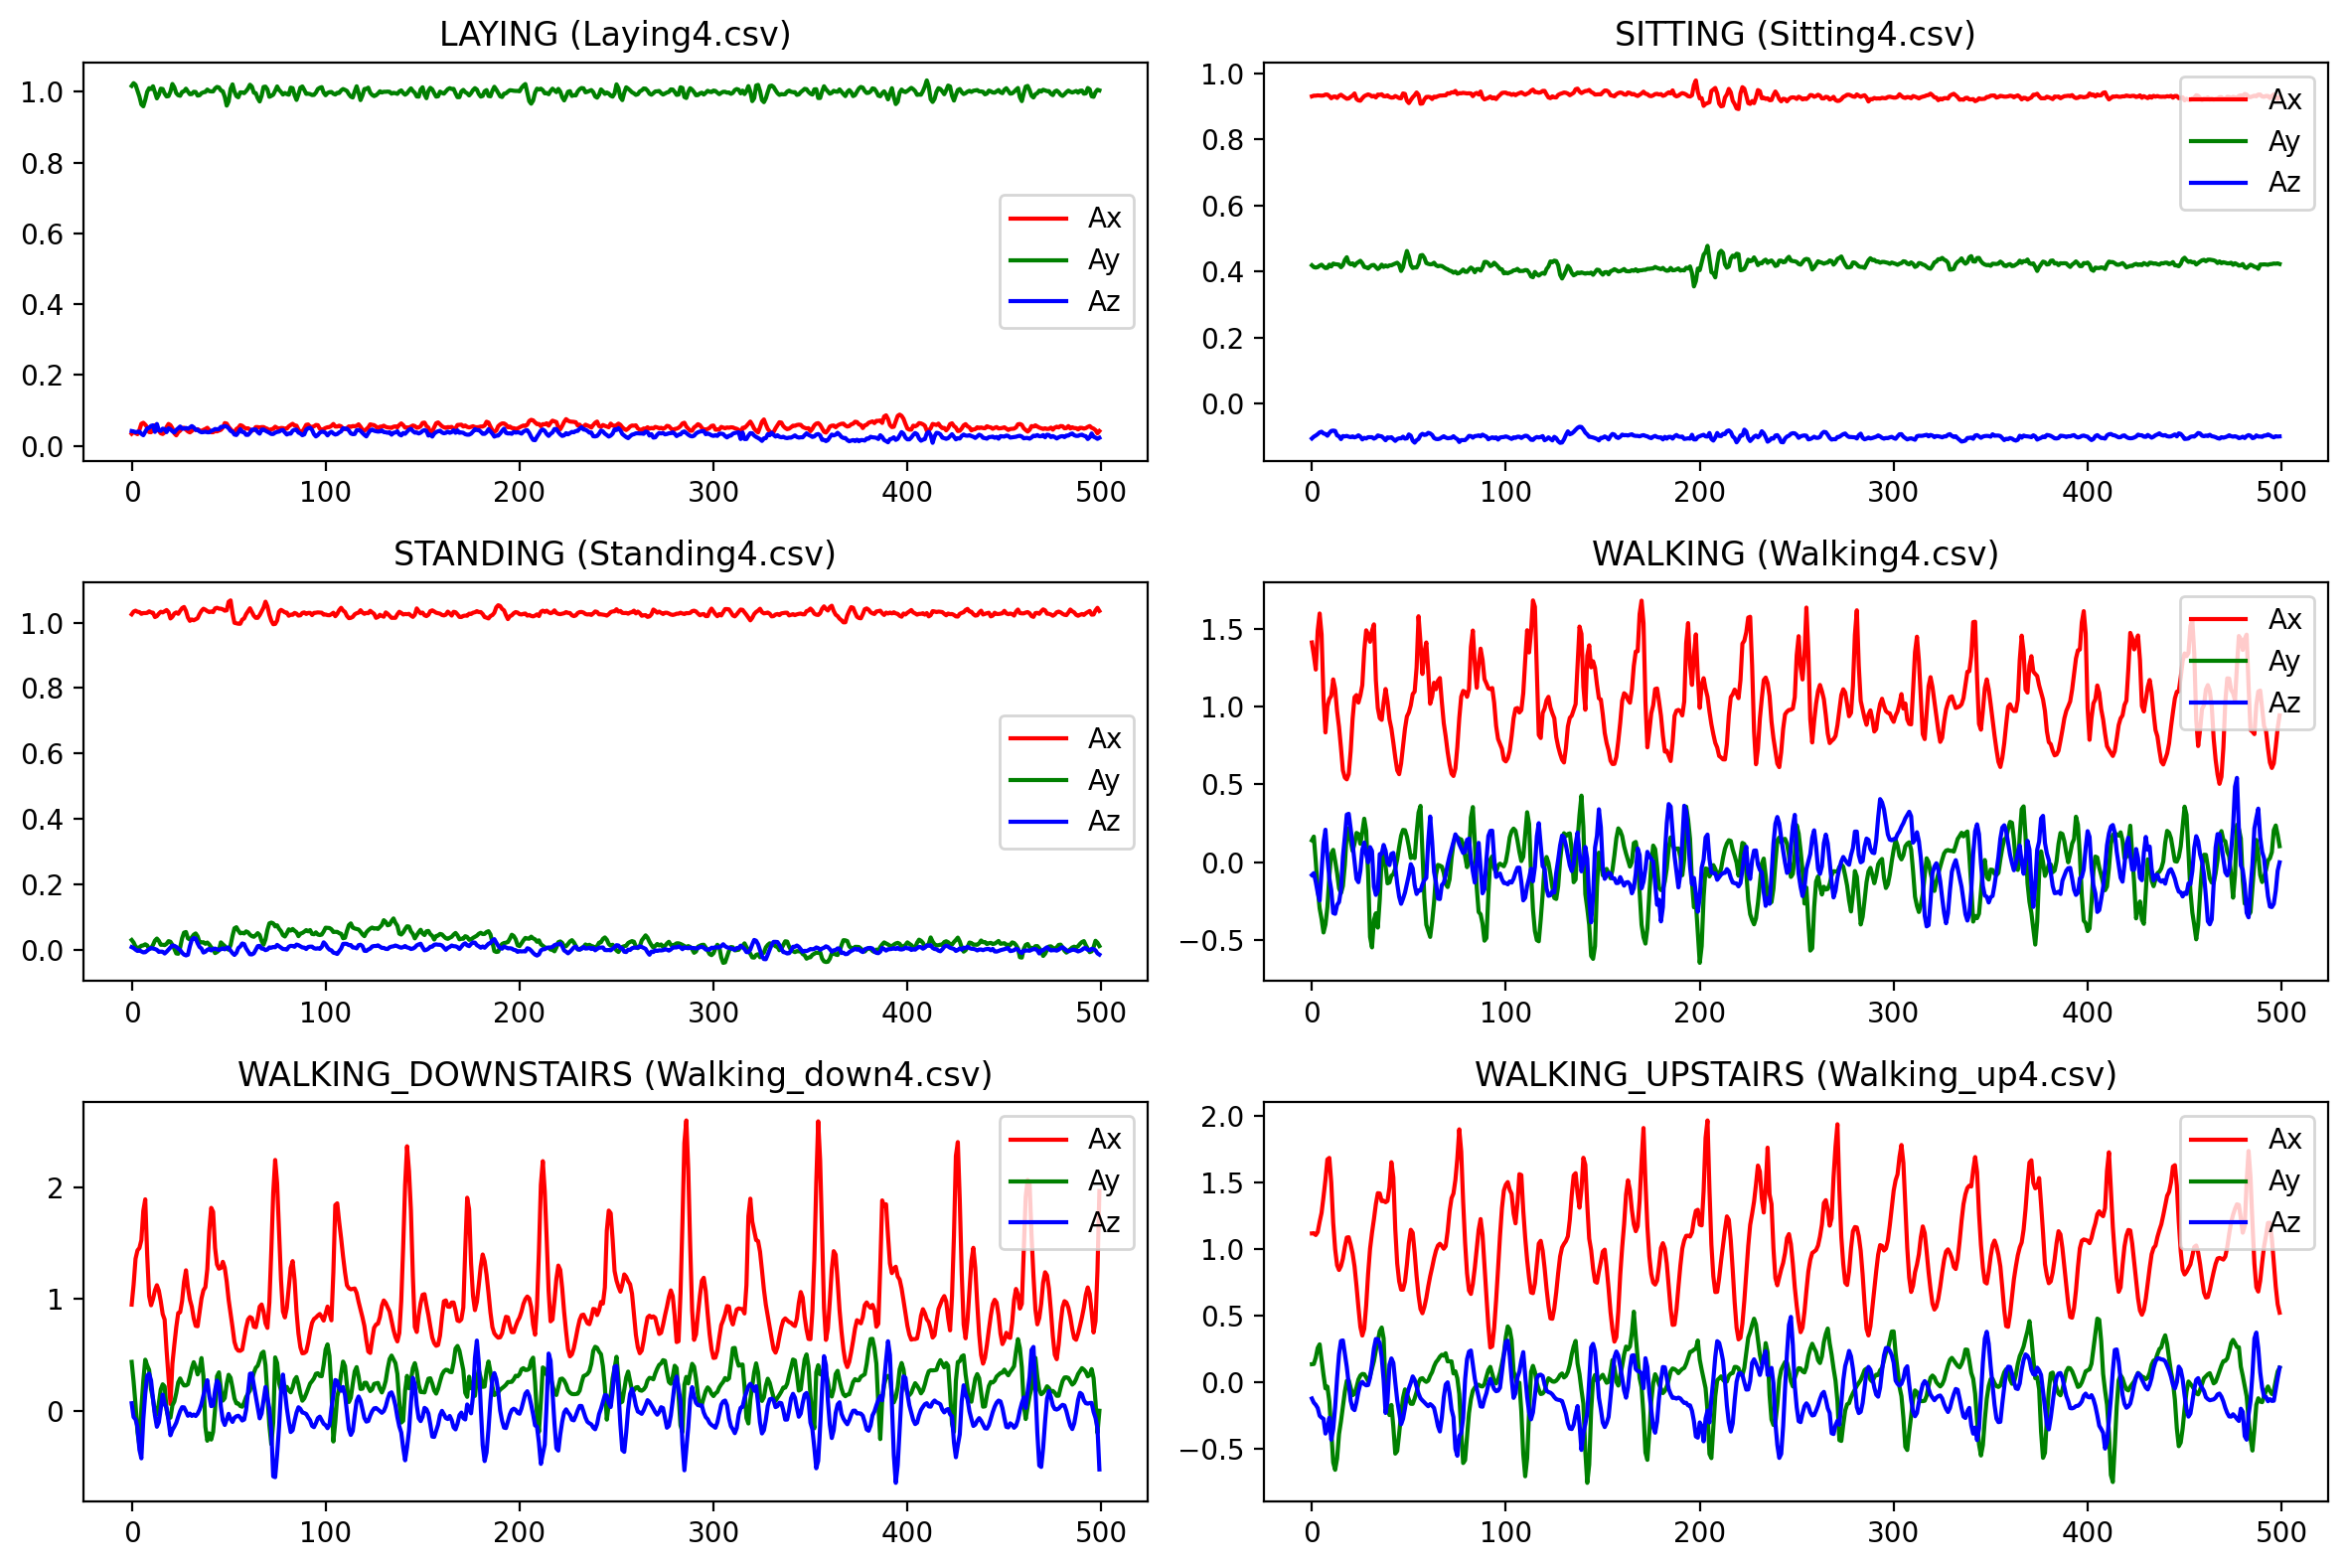

X_test shape: (6, 500, 3)
y_test shape: (6,)
Unique labels found in test: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


<Figure size 1200x800 with 0 Axes>

In [ ]:
X_test = []
y_test = []

folder_path = r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\Manual Data\Test"

# mapping rules (added walking_up / walking_down variations)
label_map = {
    "laying": "LAYING",
    "sitting": "SITTING",
    "standing": "STANDING",
    "walking": "WALKING",
    "walkingup": "WALKING_UPSTAIRS",
    "walkingupstairs": "WALKING_UPSTAIRS",
    "walking_up": "WALKING_UPSTAIRS",
    "walkingdown": "WALKING_DOWNSTAIRS",
    "walkingdownstairs": "WALKING_DOWNSTAIRS",
    "walking_down": "WALKING_DOWNSTAIRS",
}

plt.figure(figsize=(12, 8))
i = 1

for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # only process csv files
        data = pd.read_csv(os.path.join(folder_path, file))
        
        # drop unnecessary columns
        data_reduced = data.drop(columns=['time', 'TgF'])
        
        # reorder (make gFx, gFy, gFz consistent)
        data_reduced = data_reduced[['gFy', 'gFz', 'gFx']]
        data_reduced.columns = ['gFx', 'gFy', 'gFz']
        
        # downsample (400 Hz → 50 Hz)
        data = data_reduced.iloc[::8]
        
        # crop 300–800
        data = data.iloc[300:800].reset_index(drop=True)
        
        X_test.append(data.values)
        
        # ---------- label extraction ----------
        base_name = os.path.splitext(file)[0]          # remove .csv
        base_name = re.sub(r'\d+', '', base_name)      # remove digits
        base_name = base_name.lower()                  # lowercase (keep underscores)
        base_name = base_name.strip()                  # cleanup
        
        label = label_map.get(base_name, None)         # lookup in dictionary

        if label is None:
            print(f"⚠️ Skipping unknown label for file: {file}")
            continue
        else:
            y_test.append(label)
        
        # ---------- plotting ----------
        plt.subplot(3, 2, i)
        plt.plot(data['gFx'], label='Ax', color='red')
        plt.plot(data['gFy'], label='Ay', color='green')
        plt.plot(data['gFz'], label='Az', color='blue')
        plt.legend()
        plt.title(label + " (" + file + ")")
        
        i += 1
        if i > 6:
            plt.tight_layout()
            plt.show()
            plt.figure(figsize=(12, 8))
            i = 1

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Unique labels found in test:", np.unique(y_test))


In [14]:
import numpy as np
import os

save_path = r"C:\Users\siddh\OneDrive - iitgn.ac.in\ML\Assignments\ES-335-Assignment-1-2024-Fall\Datasets\Manual Data"

np.save(os.path.join(save_path, "X_train.npy"), X_train)
np.save(os.path.join(save_path, "y_train.npy"), y_train)
np.save(os.path.join(save_path, "X_test.npy"), X_test)
np.save(os.path.join(save_path, "y_test.npy"), y_test)
